<a href="https://colab.research.google.com/github/00deepureddy/STAT/blob/main/Copy_of_dllab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow scikit-learn numpy


### .1 Design a single unit perceptron for classification of a linearly #separable binary dataset without using pre-defined models. Use  #the Perceptron() from sklearn

Accuracy: 1.00


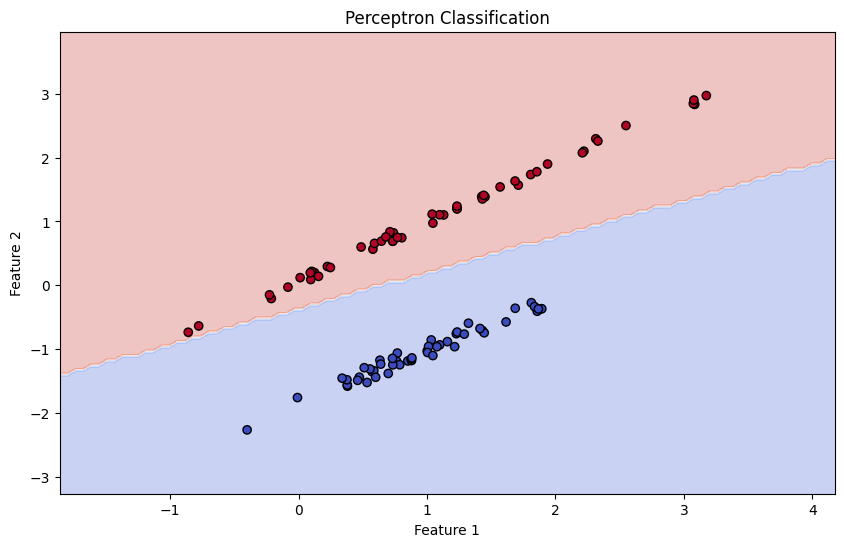

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic linearly separable dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    random_state=42
)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the Perceptron
perceptron = Perceptron(max_iter=1000, eta0=1, random_state=42)
perceptron.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, perceptron.predict(X_test))
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
plt.title("Perceptron Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 2Identify the problem with single unit Perceptron. Classify using Or-, Andand Xor-ed data and analyze the result.

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Data for AND, OR, XOR gates
data = {
    'AND': (
        np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        np.array([0, 0, 0, 1])
    ),
    'OR': (
        np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        np.array([0, 1, 1, 1])
    ),
    'XOR': (
        np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        np.array([0, 1, 1, 0])
    )
}

# Classify AND, OR, XOR gates
for gate, (X, y) in data.items():
    # Initialize and train the Perceptron
    perceptron = Perceptron(max_iter=10, eta0=1, random_state=42)
    perceptron.fit(X, y)

    # Make predictions
    y_pred = perceptron.predict(X)

    # Calculate accuracy
    acc = accuracy_score(y, y_pred) * 100

    print(f"\n{gate} gate accuracy: {acc:.2f}%")
    print(f"Predictions: {y_pred}")
    print(f"True Labels: {y}")



AND gate accuracy: 100.00%
Predictions: [0 0 0 1]
True Labels: [0 0 0 1]

OR gate accuracy: 100.00%
Predictions: [0 1 1 1]
True Labels: [0 1 1 1]

XOR gate accuracy: 50.00%
Predictions: [0 0 0 0]
True Labels: [0 1 1 0]


# 3 Build an Artificial Neural Network by implementing the Back  sets.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode labels
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build the neural network with exactly four hidden layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(64, activation='relu'),  # Hidden layer 3
    Dense(64, activation='relu'),  # Hidden layer 4
    Dense(3, activation='softmax') # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = tf.argmax(y_test, axis=1)

pred_accuracy = tf.reduce_mean(
    tf.cast(predicted_classes == true_classes, tf.float32)
)

print(f"Predicted Accuracy: {pred_accuracy.numpy() * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.5542 - loss: 1.0724 - val_accuracy: 0.8571 - val_loss: 0.9681
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8618 - loss: 0.8996 - val_accuracy: 0.8571 - val_loss: 0.7895
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8362 - loss: 0.6875 - val_accuracy: 0.8571 - val_loss: 0.5996
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8460 - loss: 0.4894 - val_accuracy: 0.8571 - val_loss: 0.4455
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8665 - loss: 0.3721 - val_accuracy: 0.9048 - val_loss: 0.3634
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9359 - loss: 0.2942 - val_accuracy: 0.9048 - val_loss: 0.3013
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8775 - loss: 0.2138 - val_accuracy: 0.9048 - val_loss: 0.2845
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9368 - loss: 0.1870 - val_accuracy: 0.9524 - val_loss: 0.3050


# 4Build a Deep Feed Forward ANN by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import inspect



iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding (version-safe)
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    encoder = OneHotEncoder(sparse_output=False)
else:
    encoder = OneHotEncoder(sparse=False)

y = encoder.fit_transform(y.reshape(-1, 1))

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


class DeepNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.output_layer(x)

model = DeepNN()

# =========================
# Loss & optimizer
# =========================
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# =========================
# Training step
# =========================
@tf.function
def train_step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(X_batch, training=True)
        loss = loss_fn(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# =========================
# Training loop
# =========================
epochs = 100
batch_size = 16

for epoch in range(epochs):
    indices = tf.random.shuffle(tf.range(len(X_train)))
    X_train_shuffled = tf.gather(X_train, indices)
    y_train_shuffled = tf.gather(y_train, indices)

    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        loss = train_step(X_batch, y_batch)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.numpy():.4f}")

# =========================
# Evaluation
# =========================
def evaluate_model(X, y):
    predictions = model(X, training=False)
    predicted_classes = tf.argmax(predictions, axis=1)
    true_classes = tf.argmax(y, axis=1)
    accuracy = tf.reduce_mean(
        tf.cast(predicted_classes == true_classes, tf.float32)
    )
    return accuracy.numpy()

accuracy = evaluate_model(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


Epoch 000 | Loss: 0.9835
Epoch 010 | Loss: 0.2211
Epoch 020 | Loss: 0.2241
Epoch 030 | Loss: 0.0043
Epoch 040 | Loss: 0.1359
Epoch 050 | Loss: 0.0034
Epoch 060 | Loss: 0.0005
Epoch 070 | Loss: 0.0021
Epoch 080 | Loss: 0.0008
Epoch 090 | Loss: 0.0001

✅ Test Accuracy: 100.00%


#5 Design and implement an Image classification model to classify a dataset of images using Deep Feed Forward NN. Record


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# =========================
# Load and preprocess data
# =========================
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# =========================
# Define the model
# =========================
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten the input images
    Dense(128, activation='relu'),     # First hidden layer
    Dense(256, activation='relu'),     # Second hidden layer
    Dense(10, activation='softmax')    # Output layer
])

# =========================
# Compile the model
# =========================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =========================
# Train the model
# =========================
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# =========================
# Evaluate the model
# =========================
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8495 - loss: 0.5205 - val_accuracy: 0.9597 - val_loss: 0.1344
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9650 - loss: 0.1186 - val_accuracy: 0.9691 - val_loss: 0.1031
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9785 - loss: 0.0749 - val_accuracy: 0.9712 - val_loss: 0.0927
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9844 - loss: 0.0513 - val_accuracy: 0.9693 - val_loss: 0.1037
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9728 - val_loss: 0.1014
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1125
Test Loss: 0.0948
Test Accuracy: 97.21%


# 6. Design and implement a CNN model (with 2 and with 4+ layers of convolutions) to classify multi category image datasets.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2

# =========================
# Load and preprocess data
# =========================
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# =========================
# Model builder function
# =========================
def build_model(regularizer=None, dropout_rate=None):
    model = models.Sequential()

    model.add(layers.Conv2D(
        32, (3, 3),
        activation='relu',
        input_shape=(28, 28, 1),
        kernel_regularizer=regularizer
    ))

    model.add(layers.Conv2D(
        64, (3, 3),
        activation='relu',
        kernel_regularizer=regularizer
    ))

    model.add(layers.MaxPooling2D((2, 2)))

    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(
        128, (3, 3),
        activation='relu',
        kernel_regularizer=regularizer
    ))

    model.add(layers.Conv2D(
        128, (3, 3),
        activation='relu',
        kernel_regularizer=regularizer
    ))

    model.add(layers.MaxPooling2D((2, 2)))

    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Flatten())

    model.add(layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizer
    ))

    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    return model

# =========================
# Compile, train, evaluate
# =========================
def compile_and_train(model, model_name):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(
        train_images,
        train_labels,
        epochs=5,
        batch_size=64,
        validation_split=0.2,
        verbose=2
    )

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")

# =========================
# Train models
# =========================
print("\nTraining Base Model...")
base_model = build_model()
compile_and_train(base_model, "Base Model")

print("\nTraining L1 Regularization Model...")
l1_model = build_model(regularizer=l1(0.001))
compile_and_train(l1_model, "L1 Regularization Model")

print("\nTraining L2 Regularization Model...")
l2_model = build_model(regularizer=l2(0.001))
compile_and_train(l2_model, "L2 Regularization Model")

print("\nTraining Dropout Model...")
dropout_model = build_model(dropout_rate=0.5)
compile_and_train(dropout_model, "Dropout Model")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Base Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 - 288s - 384ms/step - accuracy: 0.8137 - loss: 0.5081 - val_accuracy: 0.8714 - val_loss: 0.3478
Epoch 2/5
750/750 - 252s - 336ms/step - accuracy: 0.8877 - loss: 0.3050 - val_accuracy: 0.9012 - val_loss: 0.2728
Epoch 3/5
750/750 - 245s - 326ms/step - accuracy: 0.9101 - loss: 0.2494 - val_accuracy: 0.9047 - val_loss: 0.2603
Epoch 4/5
750/750 - 268s - 357ms/step - accuracy: 0.9202 - loss: 0.2164 - val_accuracy: 0.9161 - val_loss: 0.2338
Epoch 5/5
750/750 - 263s - 350ms/step - accuracy: 0.9319 - loss: 0.1891 - val_accuracy: 0.9171 - val_loss: 0.2330
Base Model Test Accuracy: 0.9133

Training L1 Regularization Model...
Epoch 1/5
750/750 - 250s - 334ms/step - accuracy: 0.7146 - loss: 1.7931 - val_accuracy: 0.7657 - val_loss: 1.0007
Epoch 2/5
750/750 - 263s - 350ms/step - accuracy: 0.7943 - loss: 0.8628 - val_accuracy: 0.8063 - val_loss: 0.7956
Epoch 3/5
750/750 - 262s - 349ms/step - accuracy: 0.8114 - loss: 0.7669 - val_accuracy: 0.8145 - val_loss: 0.7507
Epoch 4/5
750/750 